In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.datasets import make_classification

In [2]:
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0,
                   n_repeated=0, n_classes=2, n_clusters_per_class=1, weights=[0.1,0.9],
                   class_sep=0.8, random_state=1)

In [3]:
sorted(Counter(y).items())

[(0, 105), (1, 895)]

In [4]:
df = pd.DataFrame(X)
df['target'] = y
df.head()

,0,1,target
0,1.336830,-1.198694,1
1,1.169176,-0.437344,1
2,0.302318,-0.259105,1
3,1.633193,-1.098082,1
4,0.926149,-0.821085,1


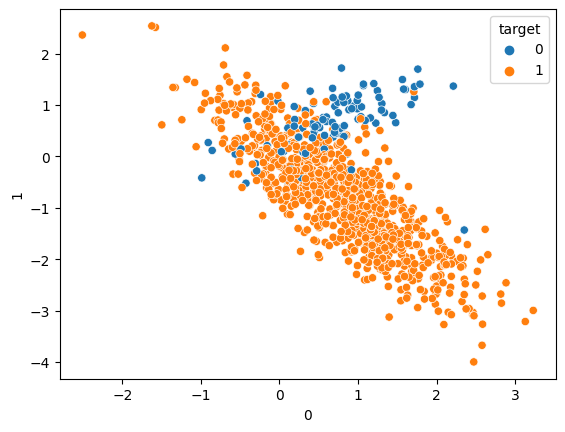

In [5]:
sns.scatterplot(data=df, x=0, y=1, hue='target')
plt.show()

### SMOTE using imblearn

In [7]:
from imblearn.over_sampling import SMOTE

In [8]:
X_resample, y_resample = SMOTE().fit_resample(X,y)

In [9]:
sorted(Counter(y_resample).items())

[(0, 895), (1, 895)]

In [10]:
df_sampled = pd.DataFrame(X_resample)
df_sampled['target'] = y_resample
df_sampled.head()

,0,1,target
0,1.336830,-1.198694,1
1,1.169176,-0.437344,1
2,0.302318,-0.259105,1
3,1.633193,-1.098082,1
4,0.926149,-0.821085,1


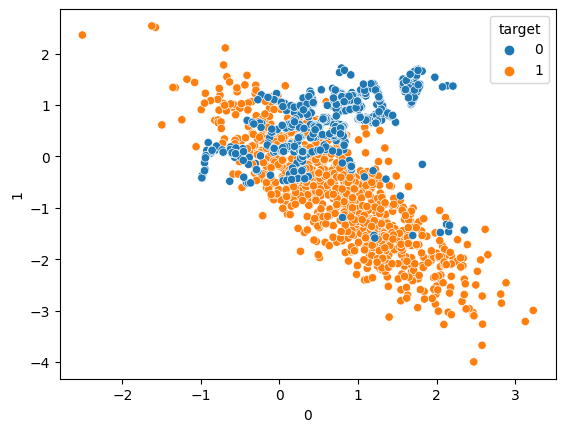

In [11]:
sns.scatterplot(data=df_sampled, x=0, y=1, hue='target')
plt.show()

### Resample with sklearn

In [12]:
df_0 = df[df.target == 0]
df_1 = df[df.target == 1]

In [13]:
df_0.shape, df_1.shape

((105, 3), (895, 3))

In [14]:
from sklearn.utils import resample

In [16]:
df_0_resample = resample(df_0, replace=True, n_samples=df_1.shape[0], random_state=0)

In [17]:
df_0_resample.shape

(895, 3)

In [18]:
df_resample = pd.concat([df_0_resample,df_1])

In [19]:
df_resample.target.value_counts()

0    895
1    895
Name: target, dtype: int64

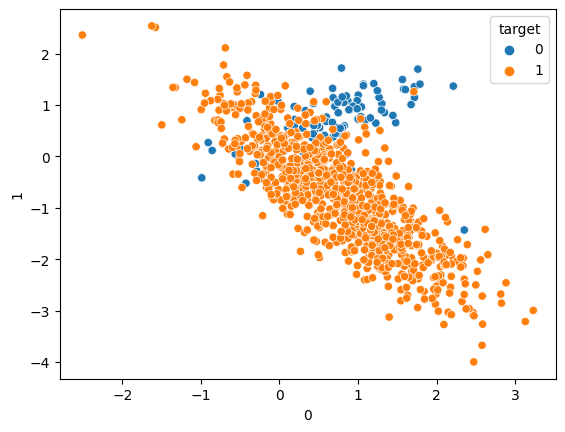

In [20]:
sns.scatterplot(data=df_resample, x=0, y=1, hue='target')
plt.show()

In [21]:
df_resample.duplicated().sum()

790